In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## A. Import and Explore the data

In [4]:
df = pd.read_csv('conversion_data.csv')
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [5]:
#check data type & null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
#check NA value
print (df.isna().sum())

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64


### a. Check target value

country
China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: converted, dtype: float64
3.225806451612903 %


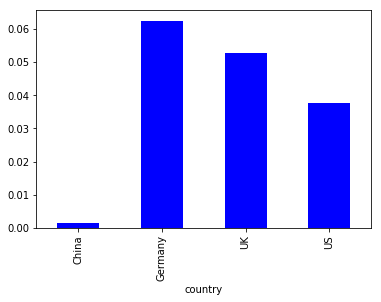

In [7]:
#check coversion rate, conversion rate  =  total user/converted = converted.mean()
df.groupby(['country'])['converted'].mean().plot(kind = 'bar', color = 'b')
print (df.groupby(['country'])['converted'].mean())
print (df['converted'].mean()*100,'%')

### b. Check other variables

In [8]:
df.groupby(['country', pd.Grouper(key='new_user')]).sum()

age  total_pages_visited  converted
country new_user                                         
China   1         1639599               243042         36
        0          710012               105767         66
Germany 1          269929                42712        227
        0          127626                25058        589
UK      1         1006424               157460        776
        0          468953                88771       1774
US      1         3724871               572482       2000
        0         1718775               305540       4732

In [9]:
df.groupby(['country'])['new_user'].mean()

country
China      0.698520
Germany    0.677237
UK         0.679835
US         0.681985
Name: new_user, dtype: float64

In [10]:
#there are some extremely data, but the main groups about the same in all countries
df.groupby('country')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,76602.0,30.672972,8.283862,17.0,24.0,30.0,36.0,69.0
Germany,13056.0,30.449985,8.289022,17.0,24.0,30.0,36.0,123.0
UK,48450.0,30.451538,8.244991,17.0,24.0,30.0,36.0,111.0
US,178092.0,30.566482,8.272128,17.0,24.0,30.0,36.0,79.0


In [11]:
df.groupby('country')['source'].value_counts()

country  source
China    Seo       37578
         Ads       21561
         Direct    17463
Germany  Seo        6432
         Ads        3760
         Direct     2864
UK       Seo       23801
         Ads       13518
         Direct    11131
US       Seo       87229
         Ads       49901
         Direct    40962
Name: source, dtype: int64

In [12]:
#check performance for each product
df.groupby(['country',pd.Grouper(key='converted')])['source'].value_counts()

country  converted  source
China    0          Seo       37532
                    Ads       21529
                    Direct    17439
         1          Seo          46
                    Ads          32
                    Direct       24
Germany  0          Seo        6020
                    Ads        3509
                    Direct     2711
         1          Seo         412
                    Ads         251
                    Direct      153
UK       0          Seo       22518
                    Ads       12766
                    Direct    10616
         1          Seo        1283
                    Ads         752
                    Direct      515
US       0          Seo       83870
                    Ads       47876
                    Direct    39614
         1          Seo        3359
                    Ads        2025
                    Direct     1348
Name: source, dtype: int64

In [15]:
df.groupby('country')['total_pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,76602.0,4.553523,2.804987,1.0,2.0,4.0,6.0,26.0
Germany,13056.0,5.190717,3.762899,1.0,2.0,4.0,7.0,27.0
UK,48450.0,5.082167,3.630763,1.0,2.0,4.0,7.0,27.0
US,178092.0,4.930160,3.427085,1.0,2.0,4.0,7.0,29.0


## B. Data Manipulate

In [16]:
#change string data to int
df['country'] = df['country'].map( {'China': 0, 'Germany': 1, 'UK': 2, 'US': 3})

df['source'] = df['source'].map( {'Seo': 0, 'Ads': 1, 'Direct': 2})

In [17]:
df.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,1,1,0
1,3,23,1,0,5,0
2,3,28,1,0,4,0
3,0,39,1,0,5,0
4,3,30,1,0,6,0


## C. Model Selection

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (f1_score, recall_score, accuracy_score, 
                             classification_report, confusion_matrix, roc_auc_score,roc_curve,auc)

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from statistics import mean 

### a. Random Forest Classifier

In [19]:
df_RFC = df.copy() #copy cleaned df
df_RFC.head(2)

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,1,1,0
1,3,23,1,0,5,0


In [20]:
X = df_RFC[['country', 'age','new_user', 'source', 'total_pages_visited']]
y = df_RFC['converted']
#split train and test as 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

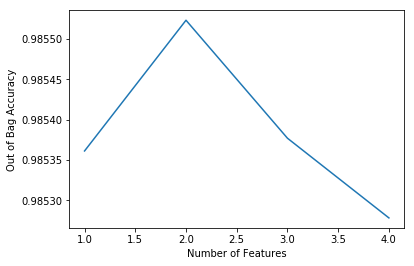

The Out of Bag Accuracy = 0.9855234029095509 and Number of Features = 2


In [21]:
#optimize the features selection
Features = range(1,5)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 50, max_features = i, min_samples_leaf = 5,
                                         oob_score = True, random_state = 1, n_jobs = -1)
        
        RFClass.fit(X_train, y_train)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show()             

print ('The Out of Bag Accuracy = %r and Number of Features = %r' %max(list(zip(oob_score_RF, Features)))) 

In [22]:
#modeling
RFClass = RandomForestClassifier(n_estimators = 50, max_features = 2, min_samples_leaf = 5, 
                                 oob_score = True, random_state = 1, n_jobs = -1)
RFClass.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [23]:
#apply trained model to test set, and print predicting conversion rate
RFC_hat = RFClass.predict(X_test)
print ('The conversion rate prediction is: %f' %(RFC_hat.mean()*100), '%')

The conversion rate prediction is: 2.617015 %


In [24]:
#generate the importances by variables
importancesDf = pd.DataFrame({'feature':X_test.columns,'importance':RFClass.feature_importances_})
importancesDf.sort_values(by = ['importance'], ascending = False).set_index('feature')
importancesDf.head(5)

,feature,importance
0,country,0.037853
1,age,0.065839
2,new_user,0.039779
3,source,0.008957
4,total_pages_visited,0.847571


In [25]:
#generate confusion matrix for test set and y_hat
print("Confusion Matrix:")
print(confusion_matrix(y_test, RFC_hat))

Confusion Matrix:
[[60945   260]
 [  640  1395]]


In [26]:
#generate summary report
print("Classification Report")
print(classification_report(y_test, RFC_hat))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.84      0.69      0.76      2035

   micro avg       0.99      0.99      0.99     63240
   macro avg       0.92      0.84      0.87     63240
weighted avg       0.98      0.99      0.99     63240



### b. Gradient Boosting Classifier

In [27]:
df_GBC = df.copy() #copy cleaned df
df_GBC.head(2)

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,1,1,0
1,3,23,1,0,5,0


In [28]:
X = df_GBC[['country', 'age','new_user', 'source', 'total_pages_visited']]
y = df_GBC['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
#optimize the learning rate
learning_rates = [0.01, 0.05, 0.25, 0.75, 1.25]
for i in learning_rates:
    GBC_Tree = GradientBoostingClassifier(learning_rate = i, n_estimators= 50,  max_depth = 10, 
                                          min_samples_leaf = 5, random_state = 607)
    GBC_Tree.fit(X_train, y_train)
    print("Learning rate: ", i)
    print("Accuracy score:", GBC_Tree.score(X_train, y_train))

Learning rate:  0.01
Accuracy score: 0.9677221695129665
Learning rate:  0.05
Accuracy score: 0.9871758380771664
Learning rate:  0.25
Accuracy score: 0.9880218216318786
Learning rate:  0.75
Accuracy score: 0.9772730866540165
Learning rate:  1.25
Accuracy score: 0.9037911132194814


In [31]:
#modeling and print conversion rate
GBC_Tree = GradientBoostingClassifier(learning_rate = 0.25, n_estimators = 50, max_depth = 10, 
                                          min_samples_leaf = 5, random_state = 607)
GBC_Tree.fit(X_train, y_train)
GBC_hat = GBC_Tree.predict(X_test)

print ('The conversion rate prediction is: %f' %(GBC_hat.mean()*100), '%')

The conversion rate prediction is: 2.617015 %


In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, GBC_hat))

Confusion Matrix:
[[60922   283]
 [  663  1372]]


In [34]:
importancesDf = pd.DataFrame({'feature':X_test.columns,'importance':(GBC_Tree.feature_importances_)})
importancesDf.sort_values(by = ['importance'], ascending = False).set_index('feature')
importancesDf.head(5)

,feature,importance
0,country,0.062485
1,age,0.072772
2,new_user,0.058671
3,source,0.023916
4,total_pages_visited,0.782155


In [35]:
print("Classification Report")
print(classification_report(y_test, GBC_hat))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.83      0.67      0.74      2035

   micro avg       0.99      0.99      0.99     63240
   macro avg       0.91      0.83      0.87     63240
weighted avg       0.98      0.99      0.98     63240



### c. Logistic Regression

In [21]:
df_LGR = pd.read_csv('conversion_data.csv') #reload original data
df_LGR.head(2)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0


In [22]:
#we reform our data here for linear model
CountryDummy = pd.get_dummies(df_LGR['country'], prefix = 'country')
del CountryDummy['country_China']

df_LGR = pd.concat([df_LGR, CountryDummy], axis =1 )
del df_LGR['country']

In [23]:
SourceDummy = pd.get_dummies(df_LGR['source'], prefix = 'source')
del SourceDummy['source_Ads']

df_LGR = pd.concat([df_LGR, SourceDummy], axis =1 )
del df_LGR['source']

In [24]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

#restrict all values between 0-1
df_LGR['age'] = Standardize(df_LGR['age'])
df_LGR['total_pages_visited'] = Standardize(df_LGR['total_pages_visited'])

In [17]:
df_LGR.head(2)

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,0.075472,1,0.000000,0,0,1,0,0,0
1,0.056604,1,0.142857,0,0,0,1,0,1


In [26]:
X = df_LGR[df_LGR.columns]
del X['converted']
y = df_LGR['converted']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
LGR = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
LGR_hat = LGR.predict(X_test)
print ('The conversion rate prediction is: %f' %(LGR_hat.mean()*100), '%')

The conversion rate prediction is: 2.572739 %


In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, LGR_hat))

Confusion Matrix:
[[60982   223]
 [  631  1404]]


In [30]:
print(classification_report(y_test, LGR_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.86      0.69      0.77      2035

   micro avg       0.99      0.99      0.99     63240
   macro avg       0.93      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240



In [31]:
list(zip(LGR.coef_[0,:] , X.columns.values ))

[(-6.967970918905542, 'age'),
 (-1.7157473047080032, 'new_user'),
 (20.44862242849629, 'total_pages_visited'),
 (3.5588094834452018, 'country_Germany'),
 (3.42022614565027, 'country_UK'),
 (3.034299652493048, 'country_US'),
 (-0.16337805017682727, 'source_Direct'),
 (-0.02100279876461277, 'source_Seo')]

## D. Adjusted Model (Logistic Regression Contd.)

#### a. Try sag and Cross-Validation

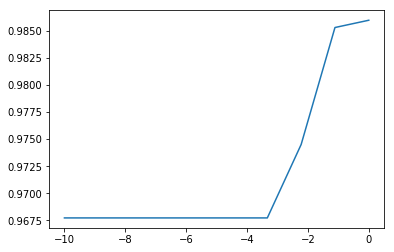

Our optimal C is 1.000000
Our accuracy at optimal C is 0.985986


In [47]:
c_list = np.logspace(-10,0,10) 
c_index = np.linspace(-10,0,10)

cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'sag', max_iter  = 100, penalty = 'l2')
    cv_scores.append(cross_val_score(lm, X_train, y_train,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))
    

In [48]:
LGR = LogisticRegression(C = 1,  solver = 'sag', max_iter  = 1000, penalty = 'l2')
LGR.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
LGR_hat = LGR.predict(X_test)
print ('The conversion rate prediction is: %f' %(LGR_hat.mean()*100), '%')

The conversion rate prediction is: 2.572739 %


In [50]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, LGR_hat))

Confusion Matrix:
[[60982   223]
 [  631  1404]]


In [51]:
print(classification_report(y_test, LGR_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.86      0.69      0.77      2035

   micro avg       0.99      0.99      0.99     63240
   macro avg       0.93      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240



#### b. Try sag and Class_weight

In [52]:
LGR = LogisticRegression(solver = 'sag', max_iter  = 1000, class_weight = 'balanced')
LGR.fit(X_train,y_train)

/Users/Lee_Lu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [53]:
LGR_hat = LGR.predict(X_test)
print ('The conversion rate prediction is: %f' %(LGR_hat.mean()*100), '%')

The conversion rate prediction is: 5.086970 %


In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, LGR_hat))

Confusion Matrix:
[[59735  1470]
 [  288  1747]]


In [55]:
print(classification_report(y_test, LGR_hat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     61205
           1       0.54      0.86      0.67      2035

   micro avg       0.97      0.97      0.97     63240
   macro avg       0.77      0.92      0.83     63240
weighted avg       0.98      0.97      0.98     63240



## D. Conclusion


#### a. Predict conversion rate
   The predicting conversion rate is around 2.57% - 2.61%, which is slightly lower than the overall rate - 3.23%.
   Since this is an imbalanced data, besides the precision performance, we also take care of recall score, f1 score, and confusion matrix value in converted data (value = 1). Overall, Logistic Regression does the best performance in precision and F1 score, also, the model able to cover 69% converted user prediction.
   
   In section D, we try to fix such issue by using penalty L2, class_weight, and sag to optimize the Logistic Regression for improving f1 score. But we couldn't find a better prediction model at this point.

#### b. Recommandations for improving conversion rate
 According to the importance of Random Forest Classifier and Gradient Boosting Classifier,  'total_pages_visited' and 'age' are the two most significant variables relating to the conversion rate. 

And 'total_pages_visited' will be the most important key fact to affect the conversion rate, that is to say, the company should invest in improving the exposure rate. Our current pages visited number is between 4.5 - 5.2, that is to say, we still have a lot of growing space.

 For the marketing aspect, in short-term, invest to Germany and UK market will bring the most benefit to conversion rate, however, we also need more data for predicting potential markets. Of course, the Chinese market holds the worst conversion rate. Due to the customer groups (age, new or return) in China is similar to the other 3 countries, we must reform our China marketing strategy as soon as possible. 
 
 For product aspect, the Seo is the most common way to reach out customer and all four countries remain the same rank Seo > Ads > Direct. I don't recommend to change this strategy since it is doing well and no other evidence shows that we should change it now.